# Keltner channels

Keltner channels has a thinner volatility than Bollinger band.  
  
It has 3 lines:  
  
Middle Line: 20-day exponential moving average  
Upper Channel Line: 20-day EMA + (2 x ATR(10))  
Lower Channel Line: 20-day EMA - (2 x ATR(10)) 
  
Trading view uses KC(20,1) with 20-day EMA and 


he True Range is the largest of the following:

The Current Period High minus (-) Current Period Low
The Absolute Value (abs) of the Current Period High minus (-) The Previous Period Close
The Absolute Value (abs) of the Current Period Low minus (-) The Previous Period Close

true range=max[(high - low), abs(high - previous close), abs (low - previous close)]

*Absolute Value is used because the ATR does not measure price direction, only volatility. 
Therefore there should be no negative numbers.

*Once you have the True Range, the Average True Range can be plotted. 
The ATR is an Exponential Moving Average of the True Range.

## 1. Prepare candlesticks

Copied from other notebooks

In [2]:
# libraries
import urllib.request as r
import json
import pandas as pd
import numpy as np
import matplotlib as plt
# candlestick
from mpl_finance import candlestick2_ochl
from mpl_finance import candlestick_ohlc
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

In [3]:
# Get data for a single crypto e.g. BTT in BNB market
base = 'https://api.binance.com'
ticker24 = '/api/v1/ticker/24hr'
candlestick = '/api/v1/klines'
params = '?symbol=WANBNB&interval=1d'
# for Bollinger bands 20 day
bb_params = '?symbol=BTTBNB&interval=12h'
httpRes = r.urlopen(base + candlestick + params)
data = json.load(httpRes)

In [4]:
columns = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume', 'Number of trades','Taker buy base asset volume','Taker buy quote asset volume','ignore']
df = pd.DataFrame(data, columns=columns)
original_data = df;

In [5]:
# change default precision of decimals
pd.set_option("display.precision", 8)
# clean and parse data
dateFormat = '%d/%m/%Y'
# df.drop('ignore', axis=1, inplace=True)
df['Open time'] = pd.to_datetime(df['Open time'], unit='ms')
df['Close time'] = pd.to_datetime(df['Close time'], unit='ms')
df[['Open', 'High', 'Low', 'Close', 'Taker buy quote asset volume']] = df[['Open', 'High', 'Low', 'Close', 'Taker buy quote asset volume']].apply(lambda x: x.astype(float))
df[['Volume', 'Taker buy base asset volume']] = df[['Volume', 'Taker buy base asset volume']].apply(lambda x: x.astype(float))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 12 columns):
Open time                       357 non-null datetime64[ns]
Open                            357 non-null float64
High                            357 non-null float64
Low                             357 non-null float64
Close                           357 non-null float64
Volume                          357 non-null float64
Close time                      357 non-null datetime64[ns]
Quote asset volume              357 non-null object
Number of trades                357 non-null int64
Taker buy base asset volume     357 non-null float64
Taker buy quote asset volume    357 non-null float64
ignore                          357 non-null object
dtypes: datetime64[ns](2), float64(7), int64(1), object(2)
memory usage: 33.5+ KB


In [6]:
## Plot candlestick
pd.options.mode.chained_assignment = None

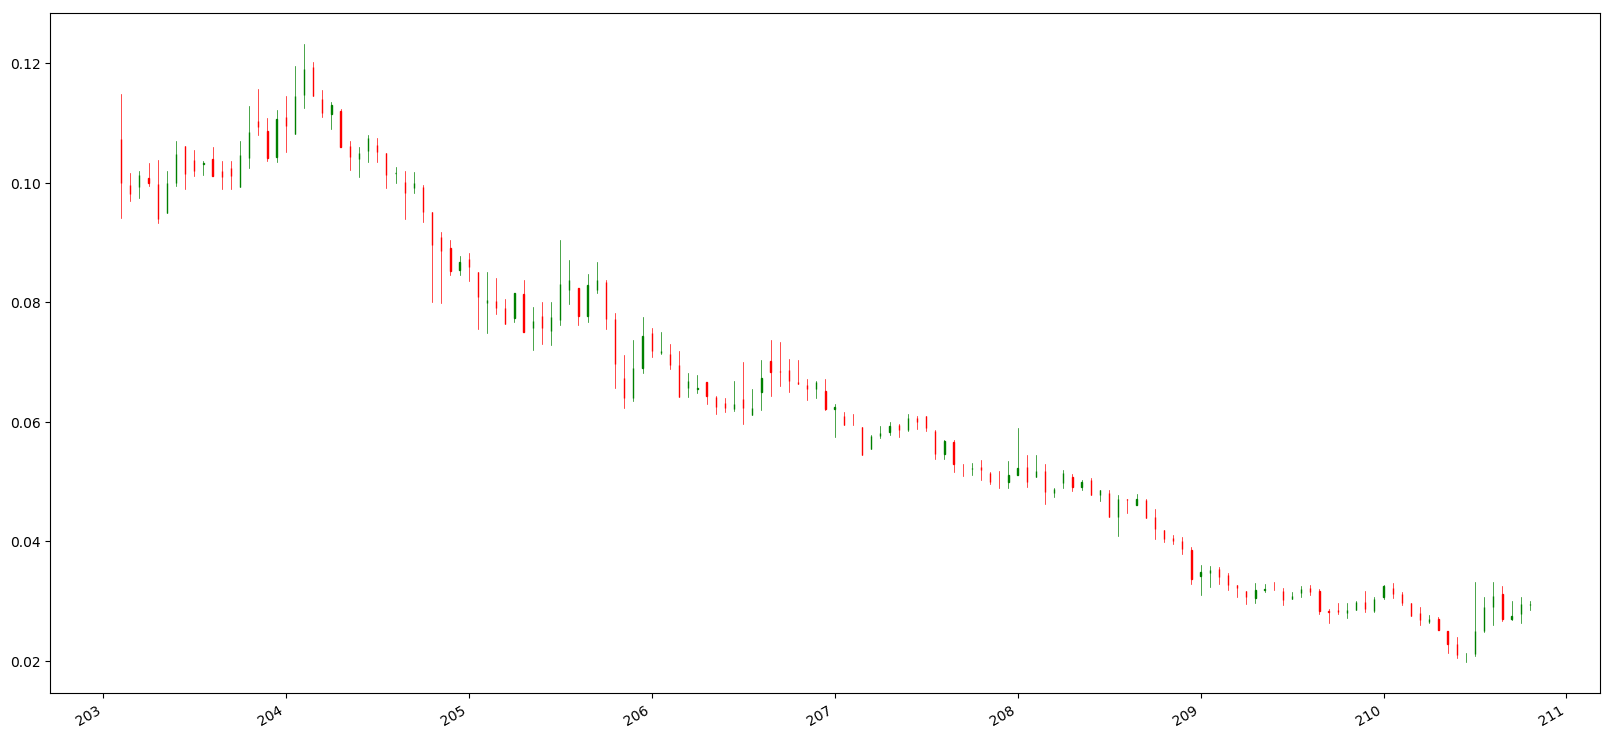

In [7]:
ohlc_df = df[['Open time', 'Open', 'High', 'Low', 'Close', 'Close time', 'Volume']]
# ohlc_df['Close time'] = mdates.date2num(ohlc_df['Close time'])
# ohlc_df.set_index('Close time', inplace=True)
zoom = ohlc_df.loc['2019-02-02': , :]
quotes = zip(zoom.index, zoom['Open'], zoom['High'], zoom['Low'], zoom['Close'])
fig, ax = plt.subplots(figsize=(20,10), dpi=100, facecolor='w', edgecolor='k')
candlestick_ohlc(ax, quotes, width=0.03, colorup='g')
ax.set_xticklabels(zoom.index,rotation=45, horizontalalignment='right')
fig.autofmt_xdate()

## Ketlner channels data

1. Get TR1, TR2, TR3
2. Get Max of All TR
3. Get ATR
4. Get 20-day EMA
5. Calculate envelopes

highest of the following:  

Method 1: Current High less the current Low  
Method 2: Current High less the previous Close (absolute value)  
Method 3: Current Low less the previous Close (absolute value)  

Current ATR = [(Prior ATR x 13) + Current TR] / 14

  - Multiply the previous 14-day ATR by 13.
  - Add the most recent day's TR value.
  - Divide the total by 14
  
Basis = 20 Period EMA

Upper Envelope = 20 Period EMA + (2 X ATR)

Lower Envelope = 20 Period EMA - (2 X ATR)

In [13]:
ohlc_df['TR1'] = ohlc_df['High'] - ohlc_df['Low']
ohlc_df['TR2'] = (ohlc_df['High'] - ohlc_df['Close'].shift()).abs()
ohlc_df['TR3'] = (ohlc_df['Low'] - ohlc_df['Close'].shift()).abs()
highest = ohlc_df[['TR1', 'TR2', 'TR3']].max(axis=1)
ohlc_df['Current TR'] = pd.Series(highest, index=ohlc_df.index)
ohlc_df['ATR'] = ohlc_df['Current TR'].ewm(span=14).mean()
ohlc_df.head(20)

,Open time,Open,High,Low,Close,Close time,Volume,TR1,TR2,TR3,Current TR,20-day EMA,ATR
300,2019-01-17,0.05105,0.05900,0.05105,0.05231,2019-01-17 23:59:59.999,69757.5,0.00795,NaN,NaN,0.00795,0.05231000,0.00795000
301,2019-01-18,0.05248,0.05448,0.04912,0.04997,2019-01-18 23:59:59.999,54456.5,0.00536,0.00217,0.00319,0.00536,0.05108150,0.00656250
302,2019-01-19,0.05067,0.05448,0.05067,0.05166,2019-01-19 23:59:59.999,18408.6,0.00381,0.00451,0.00070,0.00451,0.05129392,0.00577844
303,2019-01-20,0.05166,0.05297,0.04630,0.04830,2019-01-20 23:59:59.999,52246.7,0.00667,0.00131,0.00536,0.00667,0.05042962,0.00605119
304,2019-01-21,0.04814,0.04885,0.04747,0.04868,2019-01-21 23:59:59.999,5462.2,0.00138,0.00055,0.00083,0.00138,0.05000640,0.00483249
305,2019-01-22,0.04973,0.05185,0.04887,0.05141,2019-01-22 23:59:59.999,44592.4,0.00298,0.00317,0.00019,0.00317,0.05030250,0.00444782
306,2019-01-23,0.05075,0.05129,0.04836,0.04900,2019-01-23 23:59:59.999,17544.8,0.00293,0.00012,0.00305,0.00305,0.05005623,0.00415327
307,2019-01-24,0.04900,0.05029,0.04849,0.04982,2019-01-24 23:59:59.999,4818.1,0.00180,0.00129,0.00051,0.00180,0.05001540,0.00369300
308,2019-01-25,0.05019,0.05060,0.04770,0.04770,2019-01-25 23:59:59.999,6470.0,0.00290,0.00078,0.00212,0.00290,0.04964399,0.00354699
309,2019-01-26,0.04770,0.04851,0.04673,0.04851,2019-01-26 23:59:59.999,20008.4,0.00178,0.00081,0.00097,0.00178,0.04947322,0.00323737


In [14]:
ohlc_df['20-day EMA'] = ohlc_df['Close'].ewm(span=20).mean()
ohlc_df['Upper'] = ohlc_df['20-day EMA'] + (2*ohlc_df['ATR'])
ohlc_df['Lower'] = ohlc_df['20-day EMA'] - (2*ohlc_df['ATR'])
ohlc_df.dropna(inplace=True)
ohlc_df.tail()

,Open time,Open,High,Low,Close,Close time,Volume,TR1,TR2,TR3,Current TR,20-day EMA,ATR,Upper,Lower
352,2019-03-10,0.02891,0.03314,0.02591,0.03080,2019-03-10 23:59:59.999,722090.1,0.00723,0.00423,0.00300,0.00723,0.02788714,0.00453268,0.03695249,0.01882178
353,2019-03-11,0.03114,0.03254,0.02667,0.02705,2019-03-11 23:59:59.999,667115.1,0.00587,0.00174,0.00413,0.00587,0.02780705,0.00471107,0.03722918,0.01838492
354,2019-03-12,0.02705,0.02998,0.02680,0.02754,2019-03-12 23:59:59.999,190967.5,0.00318,0.00293,0.00025,0.00318,0.02778151,0.00450685,0.03679520,0.01876782
355,2019-03-13,0.02781,0.03067,0.02633,0.02946,2019-03-13 23:59:59.999,211723.7,0.00434,0.00313,0.00121,0.00434,0.02794196,0.00448459,0.03691114,0.01897277
356,2019-03-14,0.02926,0.03003,0.02848,0.02949,2019-03-14 23:59:59.999,40461.5,0.00155,0.00057,0.00098,0.00155,0.02808988,0.00409320,0.03627629,0.01990348


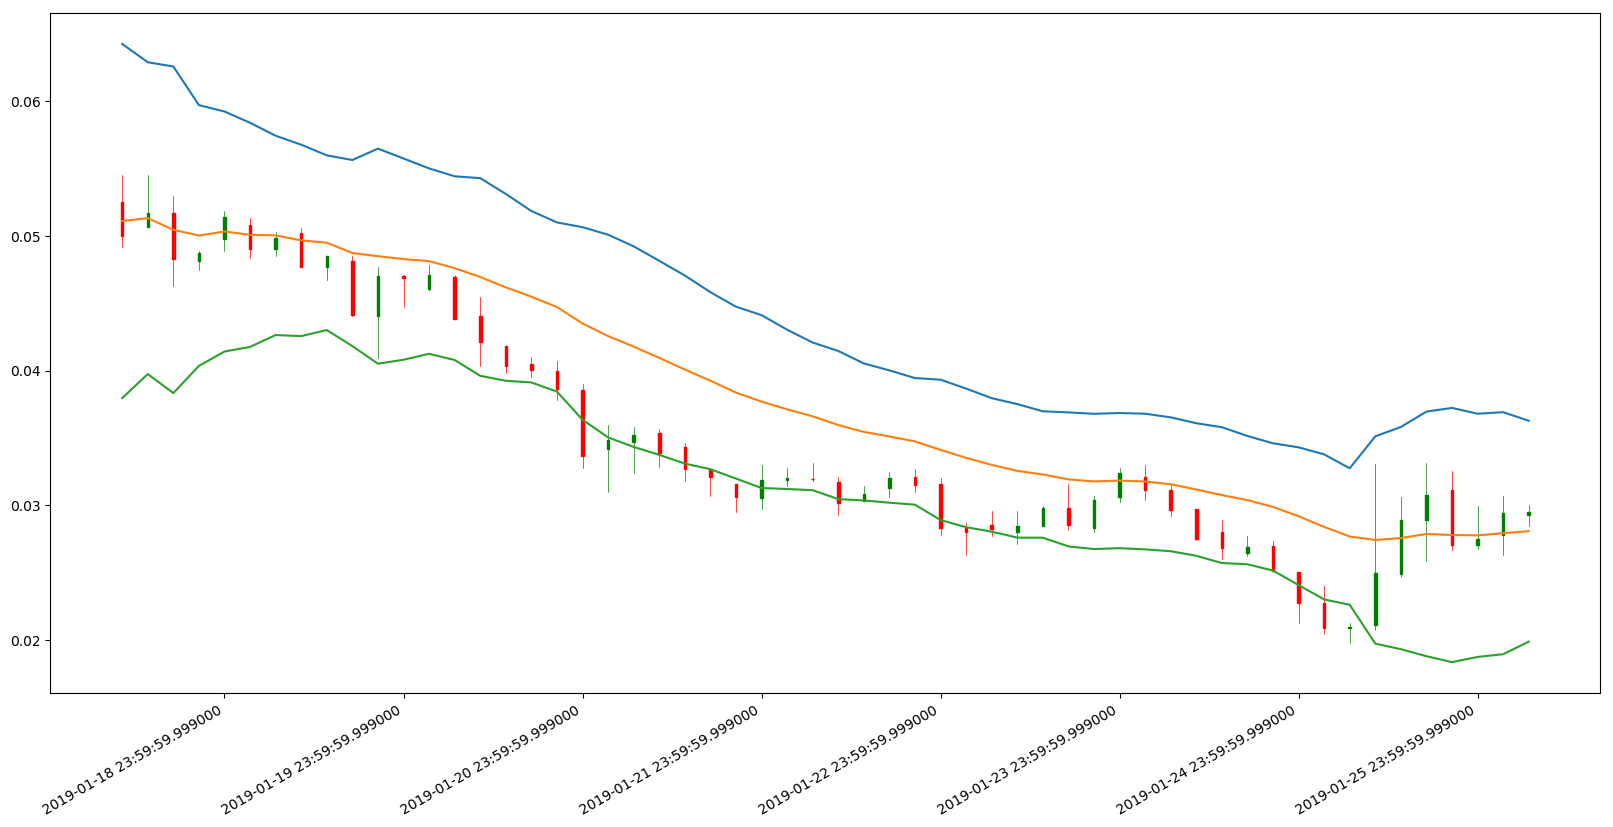

In [15]:
ohlc_df = ohlc_df.loc[300 :, :]
quotes = zip(ohlc_df['Close time'].apply(mdates.date2num), ohlc_df['Open'], ohlc_df['High'], ohlc_df['Low'], ohlc_df['Close'])
fig, ax = plt.subplots(figsize=(20,10), dpi=100)
candlestick_ohlc(ax, quotes, width=0.1, colorup='g')
ax.plot(ohlc_df['Close time'], ohlc_df['Upper'])
ax.plot(ohlc_df['Close time'], ohlc_df['20-day EMA'])
ax.plot(ohlc_df['Close time'], ohlc_df['Lower'])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d %H:%M'))
# ax.set_xlim('2019-01-01', '2019-03-03')
ax.set_xticklabels(ohlc_df['Close time'],rotation=45, horizontalalignment='right')
fig.autofmt_xdate()